In [1]:
!gdown 1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF

Downloading...
From (original): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF
From (redirected): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF&confirm=t&uuid=9c91d2a2-4d17-4141-9173-e101a6a16743
To: /home/thinh/documents/git/AIO_Project/image-retrieval/code/data.zip
100%|██████████████████████████████████████| 76.1M/76.1M [00:16<00:00, 4.62MB/s]


In [2]:
!unzip data

/bin/bash: line 1: unzip: command not found


In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
ROOT = 'data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))

In [6]:
def read_image_from_path(path, size):
    im = Image.open(path).convert('RGB').resize(size)
    return np.array(im)

def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)
    images_path = np.array(images_path)
    return images_np, images_path

In [7]:
def plot_results(querquery_pathy, ls_path_score, reverse):
    fig = plt.figure(figsize=(15, 9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(querquery_pathy, size=(448,448)))
    plt.title(f"Query Image: {querquery_pathy.split('/')[2]}", fontsize=16)
    plt.axis("off")
    for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse=reverse)[:5], 2):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size=(448,448)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}", fontsize=16)
        plt.axis("off")
    plt.show()

In [8]:
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.sum(np.abs(data - query), axis=axis_batch_size)

In [ ]:
def get_l1_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

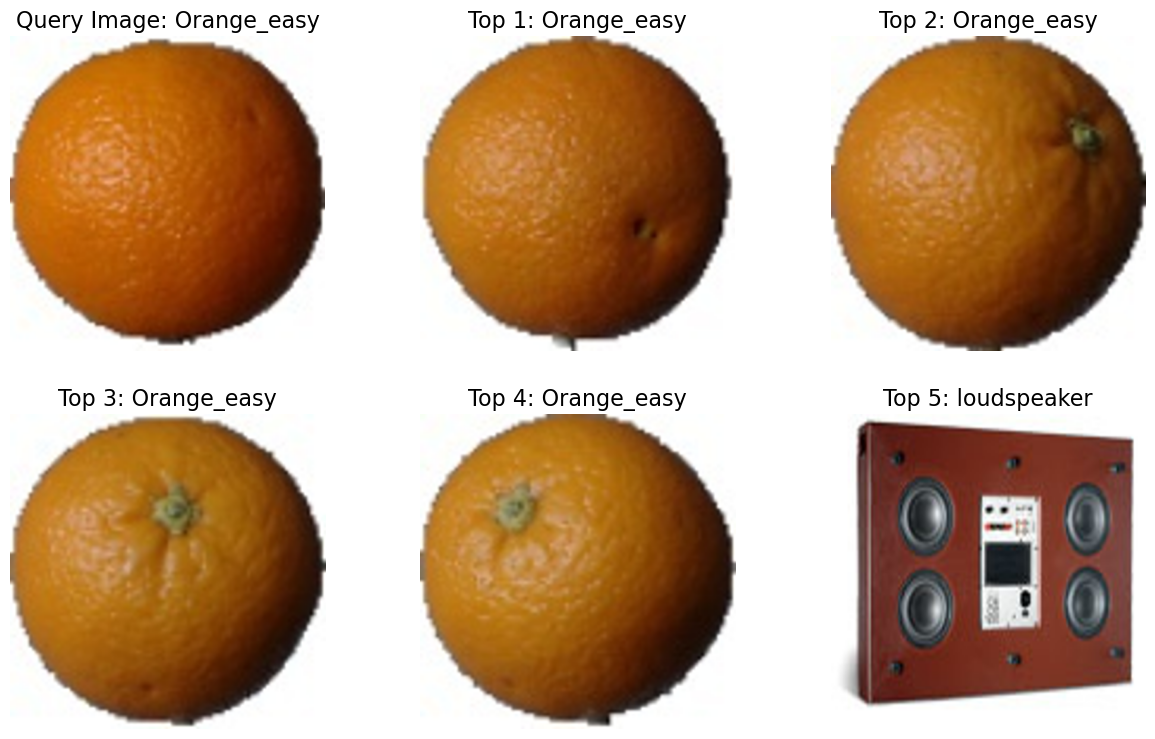

In [10]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [11]:
ls_path_score

[('data/train/half_track/n03478589_1496.JPEG', 49554028.0),
 ('data/train/half_track/n03478589_10611.JPEG', 54597515.0),
 ('data/train/half_track/n03478589_18464.JPEG', 45435435.0),
 ('data/train/half_track/n03478589_2915.JPEG', 51575288.0),
 ('data/train/half_track/n03478589_5494.JPEG', 56758508.0),
 ('data/train/half_track/n03478589_17043.JPEG', 59689731.0),
 ('data/train/half_track/n03478589_4082.JPEG', 55238611.0),
 ('data/train/half_track/n03478589_5996.JPEG', 52723320.0),
 ('data/train/half_track/n03478589_18009.JPEG', 53537202.0),
 ('data/train/half_track/n03478589_1587.JPEG', 48358501.0),
 ('data/train/knee_pad/n03623198_7294.JPEG', 54488899.0),
 ('data/train/knee_pad/n03623198_3552.JPEG', 52227610.0),
 ('data/train/knee_pad/n03623198_4415.JPEG', 57932568.0),
 ('data/train/knee_pad/n03623198_14123.JPEG', 53866985.0),
 ('data/train/knee_pad/n03623198_14574.JPEG', 66685520.0),
 ('data/train/knee_pad/n03623198_10486.JPEG', 64061889.0),
 ('data/train/knee_pad/n03623198_4447.JPEG', 

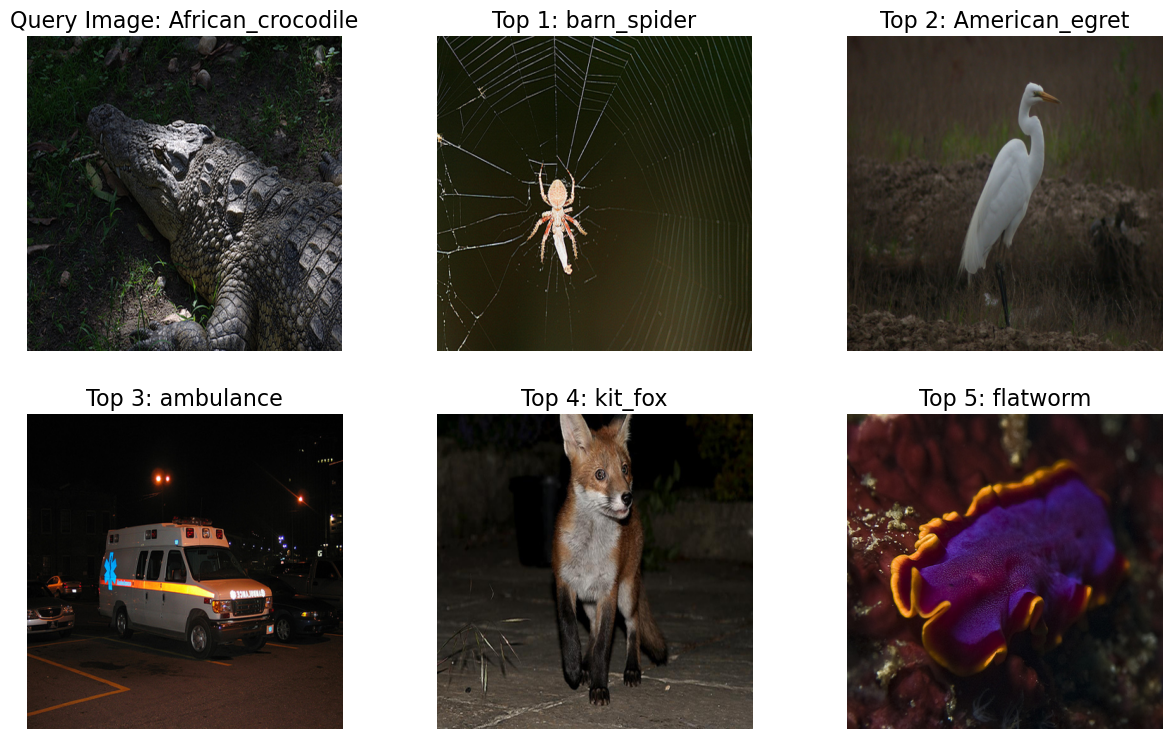

In [12]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [13]:
def mean_square_difference(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.mean((data - query)**2, axis=axis_batch_size)

In [14]:
def get_l2_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = mean_square_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

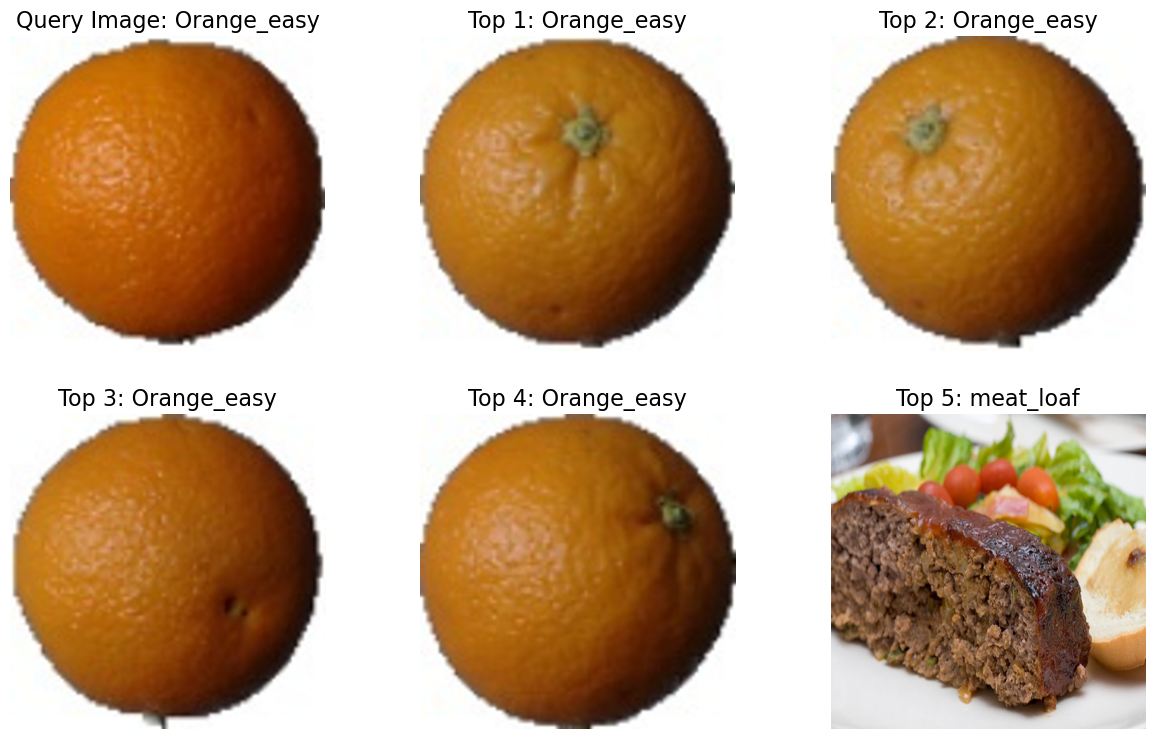

In [15]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

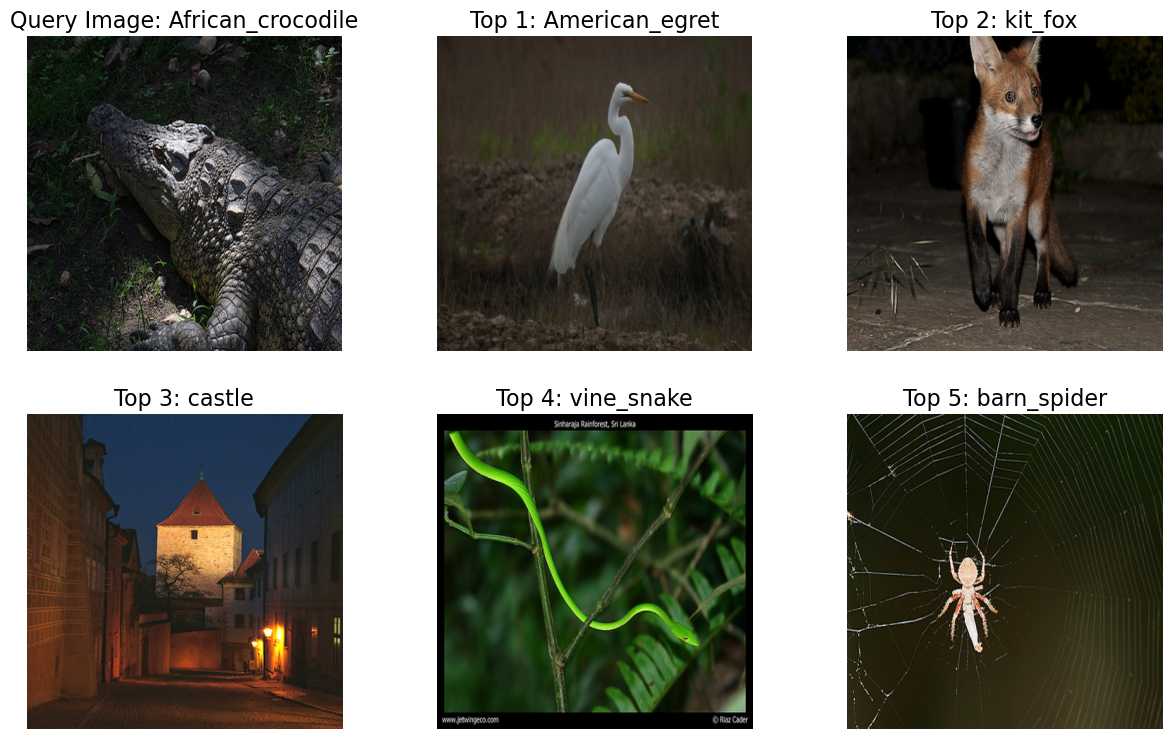

In [16]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [17]:
ls_path_score

[('data/train/half_track/n03478589_1496.JPEG', 17809.758307424534),
 ('data/train/half_track/n03478589_10611.JPEG', 12080.533181534332),
 ('data/train/half_track/n03478589_18464.JPEG', 10968.42575301605),
 ('data/train/half_track/n03478589_2915.JPEG', 22682.912903247237),
 ('data/train/half_track/n03478589_5494.JPEG', 17875.63088594813),
 ('data/train/half_track/n03478589_17043.JPEG', 31627.599275550063),
 ('data/train/half_track/n03478589_4082.JPEG', 17168.177779217156),
 ('data/train/half_track/n03478589_5996.JPEG', 12880.671436543367),
 ('data/train/half_track/n03478589_18009.JPEG', 18273.438931627337),
 ('data/train/half_track/n03478589_1587.JPEG', 8928.883236009247),
 ('data/train/knee_pad/n03623198_7294.JPEG', 22581.66420699139),
 ('data/train/knee_pad/n03623198_3552.JPEG', 5024.69968045812),
 ('data/train/knee_pad/n03623198_4415.JPEG', 29025.71488028805),
 ('data/train/knee_pad/n03623198_14123.JPEG', 14919.384259074724),
 ('data/train/knee_pad/n03623198_14574.JPEG', 17461.197637

COSINE SIMILARITY

In [18]:
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    # Apply norm
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
    return np.sum(data * query, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [19]:
def get_cosine_similarity_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

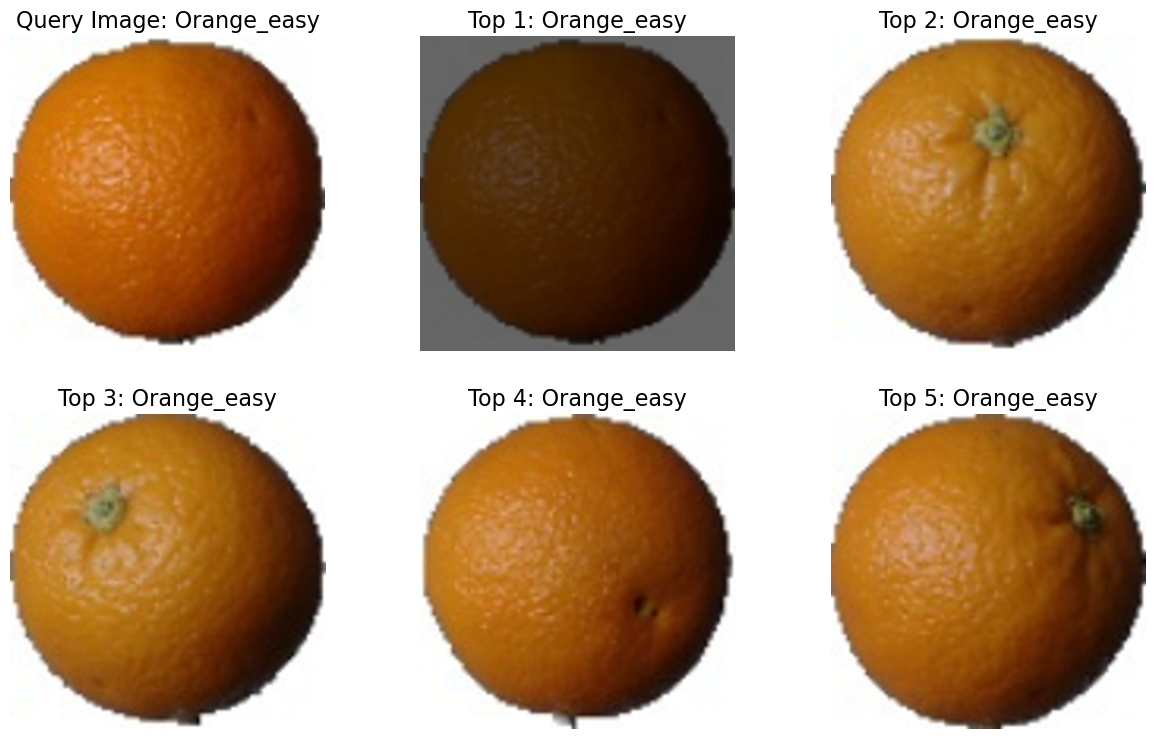

In [20]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

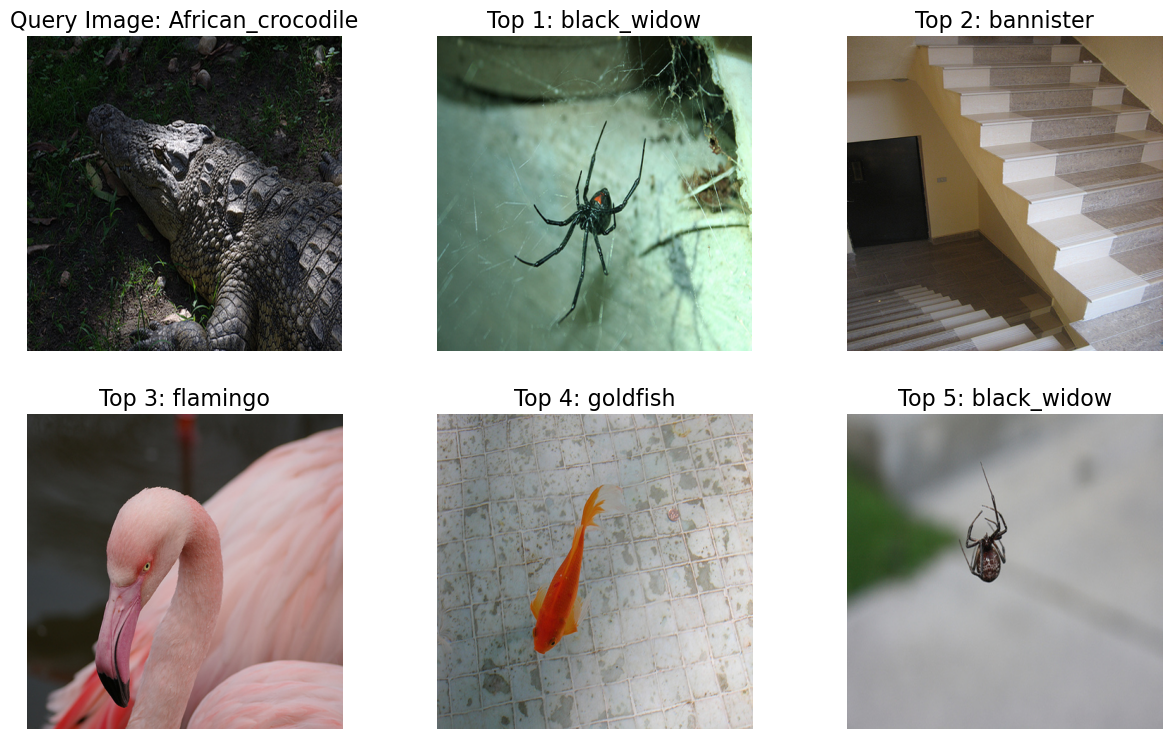

In [21]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

In [22]:
ls_path_score

[('data/train/half_track/n03478589_1496.JPEG', 3.853134134759232),
 ('data/train/half_track/n03478589_10611.JPEG', 2.6194450241871388),
 ('data/train/half_track/n03478589_18464.JPEG', 3.446844068202092),
 ('data/train/half_track/n03478589_2915.JPEG', 3.336235309099335),
 ('data/train/half_track/n03478589_5494.JPEG', 3.1888507289821524),
 ('data/train/half_track/n03478589_17043.JPEG', 3.585561347865592),
 ('data/train/half_track/n03478589_4082.JPEG', 3.6447622532301063),
 ('data/train/half_track/n03478589_5996.JPEG', 3.5731046519510805),
 ('data/train/half_track/n03478589_18009.JPEG', 3.5776186812262107),
 ('data/train/half_track/n03478589_1587.JPEG', 3.6837939252146747),
 ('data/train/knee_pad/n03623198_7294.JPEG', 3.695664167296797),
 ('data/train/knee_pad/n03623198_3552.JPEG', 3.521472713499232),
 ('data/train/knee_pad/n03623198_4415.JPEG', 3.6100126056934383),
 ('data/train/knee_pad/n03623198_14123.JPEG', 3.822879125909742),
 ('data/train/knee_pad/n03623198_14574.JPEG', 3.7543720444

CORRELATION COEFFICIENT

In [23]:
def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))

    return np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [24]:
def get_correlation_coefficient_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = correlation_coefficient(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

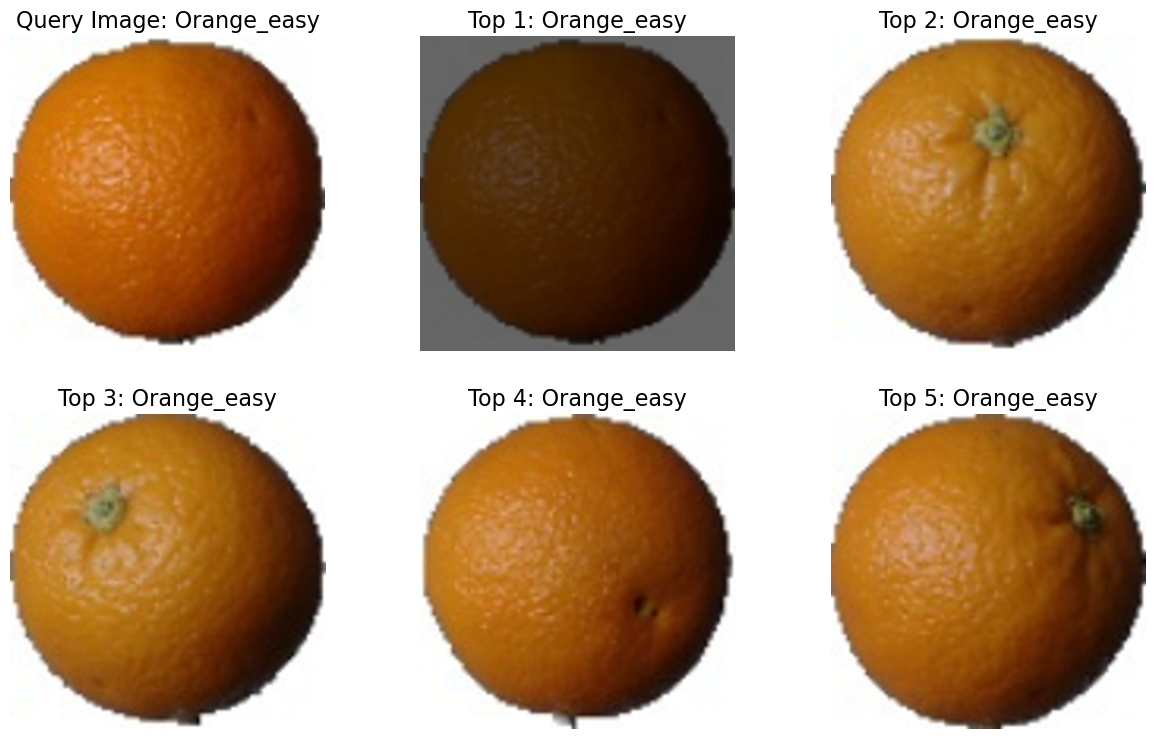

In [25]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

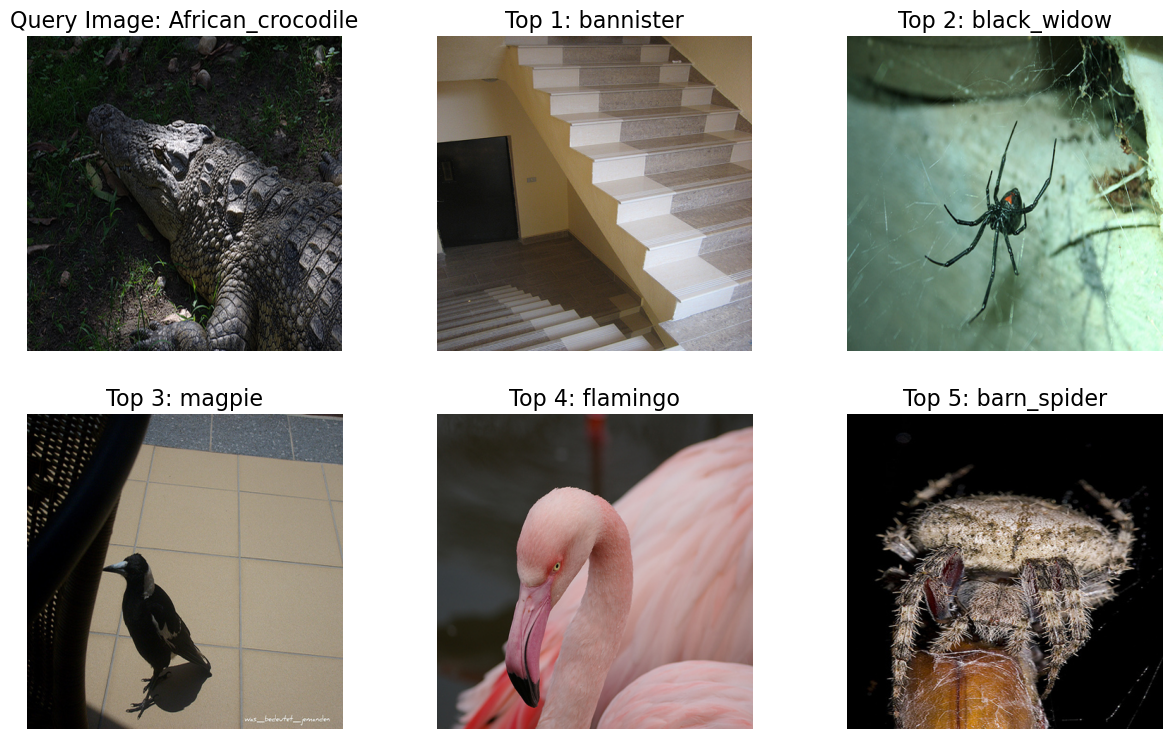

In [26]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)